<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Статистика-обращений-в-Service-desk-29.06.23---12.07.23" data-toc-modified-id="Статистика-обращений-в-Service-desk-29.06.23---12.07.23-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Статистика обращений в Service desk 29.06.23 - 12.07.23</a></span><ul class="toc-item"><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предобработка</a></span></li><li><span><a href="#Данные-после-внедрения-изменений" data-toc-modified-id="Данные-после-внедрения-изменений-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Данные после внедрения изменений</a></span><ul class="toc-item"><li><span><a href="#Заявки-без-исполнителя" data-toc-modified-id="Заявки-без-исполнителя-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Заявки без исполнителя</a></span></li><li><span><a href="#Время-обработки-обращений" data-toc-modified-id="Время-обработки-обращений-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Время обработки обращений</a></span></li><li><span><a href="#Распределение-по-базам-1С:" data-toc-modified-id="Распределение-по-базам-1С:-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Распределение по базам 1С:</a></span></li></ul></li><li><span><a href="#Данные-до-внесения-изменений" data-toc-modified-id="Данные-до-внесения-изменений-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Данные до внесения изменений</a></span><ul class="toc-item"><li><span><a href="#Сравнение-распределений-до-и-после-изменений" data-toc-modified-id="Сравнение-распределений-до-и-после-изменений-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Сравнение распределений до и после изменений</a></span><ul class="toc-item"><li><span><a href="#Время-на-обработку-задачи" data-toc-modified-id="Время-на-обработку-задачи-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>Время на обработку задачи</a></span></li></ul></li><li><span><a href="#Распределение-по-отделам" data-toc-modified-id="Распределение-по-отделам-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Распределение по отделам</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li></ul></div>

# Статистика обращений в Service desk 29.06.23 - 12.07.23

Выгружен весь реестр заявок из Pyrus за всё время. Он включает в себя открытые и завершенные заявки.  
Была обновлена форма для обращений в тех.поддержку 28 июня и изменен алгоритм обработки обращений. Цель - сверить данные до и после изменений, а также собрать статистику по количеству обращений по отделам и времени обработки.  

Потребуется отфильтровать данные для получения статистики после изменений. Изменения были перенесены 28 июня вечером, и часть заявок в тот день успела пойти по новой форме. Заявки за 28 июня перемешаны по старой и новой форме, поэтому в качестве даты отсчета возьмем 29 июня. Начиная с этого дня изменения полностью вступили в силу.  
Сравним их с данными за всё время по тем параметрам, которые будут доступны.

Загрузка данных:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mplcyberpunk
import datetime as dt
from datetime import date
from datetime import timedelta
import numpy as np
import re

In [2]:
data = pd.read_csv(r'C:\Users\evgeniya.ermakova\Desktop\ERMAKOVA E\SD_Pyrus\stats_290623_120723.csv', sep=';')

In [3]:
data.head()

,task_id,group,database,problem,email,subject,creation_date,step,step_with_aligner,overdue,...,service,resource,equipment,software,phone,initiator_email,department,status,executor,result
0,#174196486,1C,Другое,"Коллеги,\nСегодня наша стандартная обработка Р...",maria.sorokina@uind.ru,замены в обработке распределение товаров,12.07.23 17:44,2,2: in progress (Андрей Щербаков),Нет,...,NaN,NaN,NaN,NaN,7.910451e+10,maria.sorokina@uind.ru,Parts,Новая,NaN,NaN
1,#174194143,1C,PSOP,"Женя,\nДля ТСК Техника нужны 3 новых доступа:\...","maria.sorokina@uind.ru, sergey.plakhtiy@uind.ru",Три новых доступа в тонкий клиент ТСК Техника ...,12.07.23 17:41,2,2: in progress (Андрей Щербаков),Нет,...,NaN,NaN,NaN,NaN,7.910451e+10,maria.sorokina@uind.ru,Parts,Решена,Евгения Ермакова,Доступ предоставлен kkonovalkov eshevelev knik...
2,#174185565,1C,Trade Management,Коллеги. \nНеверно сформирован номер дополните...,"vera.boshkovich@uind.ru,andrey.tatarchenkov@ui...",Неправильно сформирован номер допсоглашения Во...,12.07.23 17:08,2,2: in progress (Андрей Щербаков),Нет,...,NaN,NaN,NaN,NaN,7.916201e+10,vera.boshkovich@uind.ru,Whole goods,Новая,NaN,NaN
3,#174185316,Офисные программы,NaN,не отправляются письма,svetlana.zhelobaeva@uind.ru,настройка эл.почты,12.07.23 17:06,2,2: in progress (Максим Фостиков),Нет,...,NaN,NaN,NaN,Outlook,7.916201e+10,svetlana.zhelobaeva@uind.ru,Accounting,Новая,NaN,NaN
4,#174185266,Офисные программы,NaN,Прошу разблокировать корпоративную учетную запись,svetlana.zhelobaeva@uind.ru,Учетная запись,12.07.23 17:06,2,2: in progress (Андрей Щербаков),Нет,...,NaN,NaN,NaN,Другое,7.916201e+10,svetlana.zhelobaeva@uind.ru,Accounting,Решена,Андрей Щербаков,Учетная запись разблокирована. Изменен пароль ...


## Предобработка

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   task_id            998 non-null    object 
 1   group              985 non-null    object 
 2   database           394 non-null    object 
 3   problem            995 non-null    object 
 4   email              998 non-null    object 
 5   subject            998 non-null    object 
 6   creation_date      998 non-null    object 
 7   step               998 non-null    int64  
 8   step_with_aligner  998 non-null    object 
 9   overdue            998 non-null    object 
 10  end_date           959 non-null    object 
 11  last_activity      998 non-null    object 
 12  service            3 non-null      object 
 13  resource           21 non-null     object 
 14  equipment          18 non-null     object 
 15  software           44 non-null     object 
 16  phone              188 non

Много незаполненных значений в столбцах `service`, `resource`, `equipment`, `software` - это специфика формы, т.к. она предполагает выбор услуги. Также мало значений в поле `phone` - это контактные данные, сотрудники часто не оставляют их.  

Также электронная почта инициатора заполнена только в 259 заявках. Это те заявки, которые были открыты до переноса изменений (28 июня) и пошли по старому маршруту.  

Нужно:
- привести `task_id` к числовому типу для расчетов и построения графиков;
- привести все даты к правильному типу данных;
- заменить `\n` на пробел;

Преобразуем `task_id` в число. Сначала уберем символ `#`, т.к. он помешает преобразованию и не нужен:

In [5]:
data['task_id'] = data['task_id'].str.replace('#', '')

In [6]:
data['task_id'] = pd.to_numeric(data['task_id'])

Преобразовываем даты в `datetime`. Нам нужны данные и по дате, и по времени. Заявки могут быть открыты и закрыты в один и тот же день - в этом случае время обработки составит меньше суток. Добавляем параметр `dayfirst=True`, чтобы при преобразовании в дату месяц и день остались на своих местах:

In [7]:
data[['creation_date', 'end_date']] = data[['creation_date',
                                            'end_date']].apply(lambda x: pd.to_datetime(x, dayfirst=True))

In [8]:
data[['creation_date', 'end_date']].info() # проверка формата данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   creation_date  998 non-null    datetime64[ns]
 1   end_date       959 non-null    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 15.7 KB


Подчистим данные в столбце `problem`:

In [9]:
data['problem'] = data['problem'].str.replace('\n', ' ')

Заполнять пропуски в данных не будем, т.к. датасет включает весь реестр заявок до изменений и после. Важно понять, пропускаются ли какие-либо значения после изменений, поэтому разделим наши данные на две группы и проанализируем пропуски отдельно в каждой из них.

В дальнейшем нам потребуется время, затраченное на обработку заявок - с того момента, как обращение попадает в систему, до момента завершения задачи.  
Добавим столбец `delta`, в который запишем разницу между `creation_date` и `end_date`:

In [10]:
data['delta'] = (data['end_date'] - data['creation_date']) # считаем дельту
data['delta'] = data['delta'].apply(lambda x: x.total_seconds() / 60).round() # переводим в минуты

Проверим, в каких датах распределяются значения, и нет ли там ошибок:

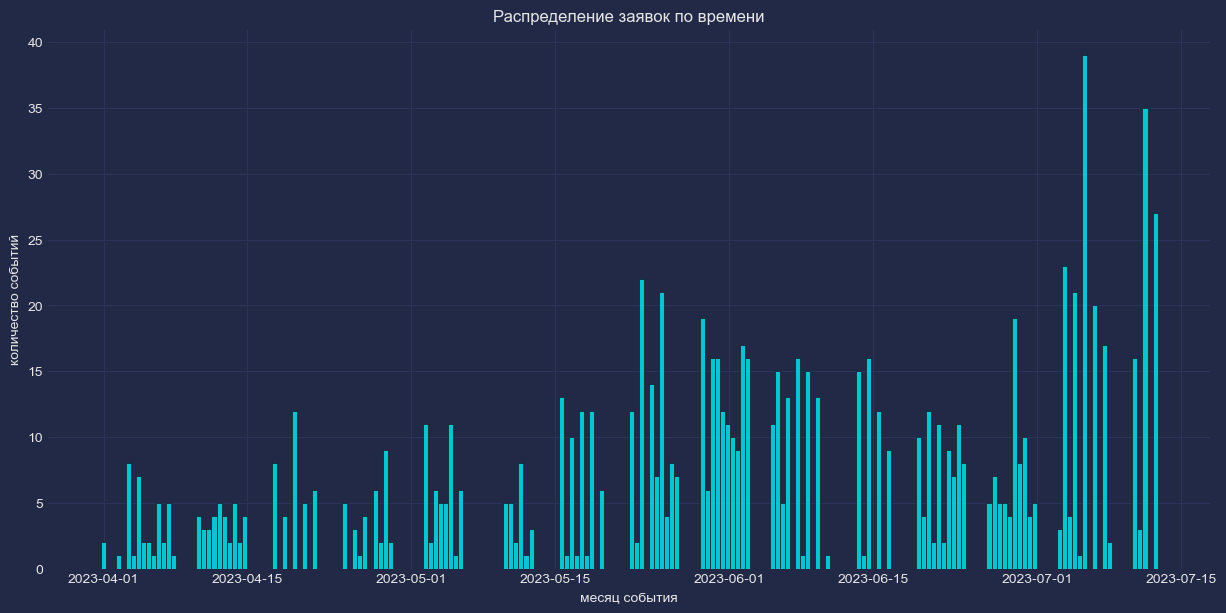

In [11]:
with plt.style.context('cyberpunk'):
    fig,ax = plt.subplots(figsize=(15,7))
    sns.histplot(data['creation_date'], bins=30*7)
    ax.set_title('Распределение заявок по времени')
    ax.set_xlabel('месяц события')
    ax.set_ylabel('количество событий')
    plt.show()

Ожидаемо, количество заявок сильно возросло, начиная с середины мая. Это произошло по двум причинам:
- в этот период была миграция в новый домен;
- в этот же период сотрудники начали активно использовать Pyrus в качестве канала для обращений в службу поддержки. Ранее сотрудники обращались в отдел напрямую или писали письмо на почту, поскольку была отключена корпоративная система для регистрации заявок CNH.

## Данные после внедрения изменений

Выделим данные за две недели с 29 июня по 12 июля. Отфильтруем заявки по дате создания:

In [12]:
start_date = pd.to_datetime('2023-06-29')
end_date = pd.to_datetime('2023-07-12')

In [13]:
data_after = data.query('@start_date <= creation_date <= @end_date')

In [14]:
data_after.shape

(211, 23)

In [15]:
data_after.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 27 to 237
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   task_id            211 non-null    int64         
 1   group              198 non-null    object        
 2   database           122 non-null    object        
 3   problem            210 non-null    object        
 4   email              211 non-null    object        
 5   subject            211 non-null    object        
 6   creation_date      211 non-null    datetime64[ns]
 7   step               211 non-null    int64         
 8   step_with_aligner  211 non-null    object        
 9   overdue            211 non-null    object        
 10  end_date           188 non-null    datetime64[ns]
 11  last_activity      211 non-null    object        
 12  service            3 non-null      object        
 13  resource           16 non-null     object        
 14  equipment

Форма в Pyrus организована таким образом, что обязательно нужно заполнить поле `С чем проблема`, в датасете это столбец `group`. Значение выбирается из списка. Если поле не заполнено, это означает, что заявка пришла с электронной почты, и первая линия поддержки ее еще не обработала. У нас есть одна такая незаполненная заявка, отсечем ее:

In [16]:
data_after = data_after[~data_after['group'].isna()]

Поля `resource`, `equipment`, `software` заполняются в том случае, если в поле `С чем проблема` выбрано что-то, отличное от `1C`, поэтому в них, как и в поле `database` есть пропуски. Это нормально, такова специфика формы.

Также есть две незаполненных строки `initiator_email`, они для нас бесполезны, но они уже были отсечены на предыдущем этапе. Такие строки также характерны для заявок, которые еще не обработаны.

### Заявки без исполнителя

Пропусков в столбце `executor` больше. Это поле заполняется исполнителем вручную, и оно необязательно к заполнению. Посмотрим, все ли из этих заявок закрыты. У открытых заявок в столбце `end_date` будет пусто.

In [17]:
without_executor = data_after[data_after['executor'].isna()].copy()

Общее количество заявок без исполнителя:

In [18]:
without_executor.shape

(61, 23)

Добавляем признак `closed` в новый столбец, чтобы понять, какое количество заявок закрыто:

In [19]:
without_executor['closed'] = without_executor['end_date'].isna().astype('object')

In [20]:
empty_pivot = without_executor.pivot_table(index='closed',
                                           values='task_id',
                                           aggfunc='count').reset_index()

In [21]:
empty_pivot

,closed,task_id
0,False,44
1,True,17


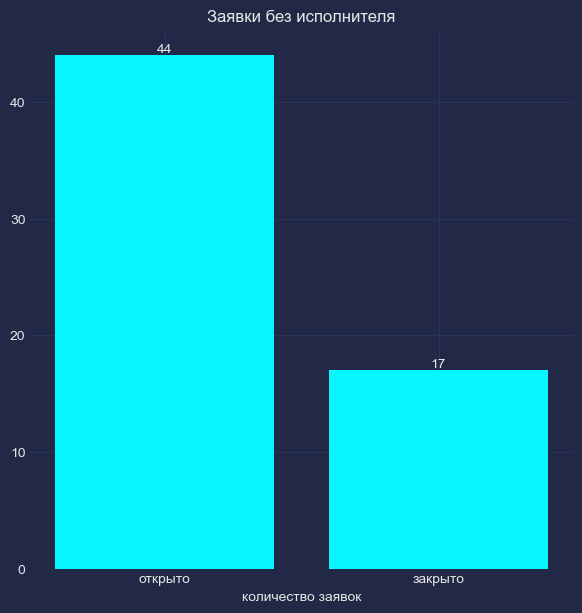

In [22]:
with plt.style.context('cyberpunk'):
    fig,ax = plt.subplots(figsize=(7,7))
    x = ['открыто', 'закрыто']
    y = [44,17]
    ax.bar(x,y)
    plt.bar_label(ax.containers[0])
    ax.set_xlabel('количество заявок')
    ax.set_title('Заявки без исполнителя')
    plt.show()

Большая часть заявок без исполнителя еще открыта, при завершении задачи исполнителя желательно заполнять, т.к. заявки в основном назначаются на роль, поэтому конкретный исполнитель не всегда известен.

### Время обработки обращений

Просроченные задачи:

In [23]:
data_after['overdue'].value_counts()

Нет    198
Name: overdue, dtype: int64

Просроченных задач по мнению Pyrus нет, но это логично, т.к. сейчас установлены рандомные SLA с учетом рабочего времени:
- 1 линия: 24 ч, т.е. три рабочих дня. Это время на обработку заявки;
- 2 линия: 48 ч., т.е. шесть рабочих дней. Это время на решение проблемы, описанной в заявке.

Время на обработку заявки первой линией у нас минимальное, это видно и в аналитике Pyrus. Визуализируем полное время от открытия заявки до ее закрытия.

Отфильтруем незакрытые задачи, т.к. дельта там будет равна 0:

In [24]:
print('Количество открытых задач:', data_after['end_date'].isna().sum())

Количество открытых задач: 23


In [25]:
data_after_closed = data_after[~data_after['end_date'].isna()]

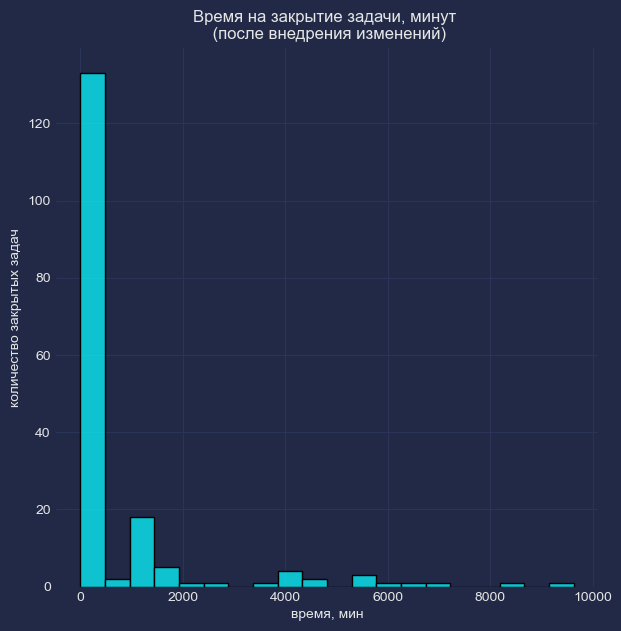

In [26]:
with plt.style.context('cyberpunk'):
    fig,ax = plt.subplots(figsize=(7,7))
    sns.histplot(data_after_closed['delta'], bins=20)
    mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.8)
    ax.set_title('Время на закрытие задачи, минут \n (после внедрения изменений)')
    ax.set_xlabel('время, мин')
    ax.set_ylabel('количество закрытых задач')
    plt.show()

In [27]:
print('Среднее время до закрытия задачи в минутах:', data_after['delta'].median())

Среднее время до закрытия задачи в минутах: 54.0


На неделе с 29 июня по 6 июля был всплеск небольших задач (восстановление учетных записей дилеров), которые закрывались за 10-20 минут. Это разовая акция, обычно таких задач мало.  

Основная часть, как видно из графика, делится на две группы: первые закрываются за время около 2-х часов. Вторая значительная часть задач требует более 2 часов решения. Среднее время до закрытия задачи за период две недели составляло чуть меньше часа, но нужно учитывать, что среднее значение сильно исказилось из-за потока разовых быстрых заявок, и, конечно же, не берем в расчет несколько долгоиграющих заявок, где время достигает нескольких дней.  

Чуть позже отфильтруем выбросы и посмотрим, как изменится время на обработку.

In [28]:
processing_time = data_after.pivot_table(index='group',
                                         values='delta',
                                         aggfunc=['median', 'mean', 'count']).round().reset_index()
processing_time.columns = ['С чем проблема', 'Медианное время, мин', 'Среднее время, мин', 'Количество заявок']

In [29]:
processing_time.sort_values(by='Медианное время, мин', ascending=False)

,С чем проблема,"Медианное время, мин","Среднее время, мин",Количество заявок
0,1C,72.0,870.0,100
3,Мобильная связь,65.0,565.0,3
1,Запрос доступа,52.0,1137.0,16
4,Офисные программы,28.0,171.0,40
2,ИТ оборудование,13.0,796.0,16


У нас очень разрозненный датасет, что логично, т.к. запросы очень разные, поэтому среднее время далеко от медианного - среднее искажают выбросы.  
Все равно визуализируем время, как есть, чтобы было видно, в каких группах выбросы:

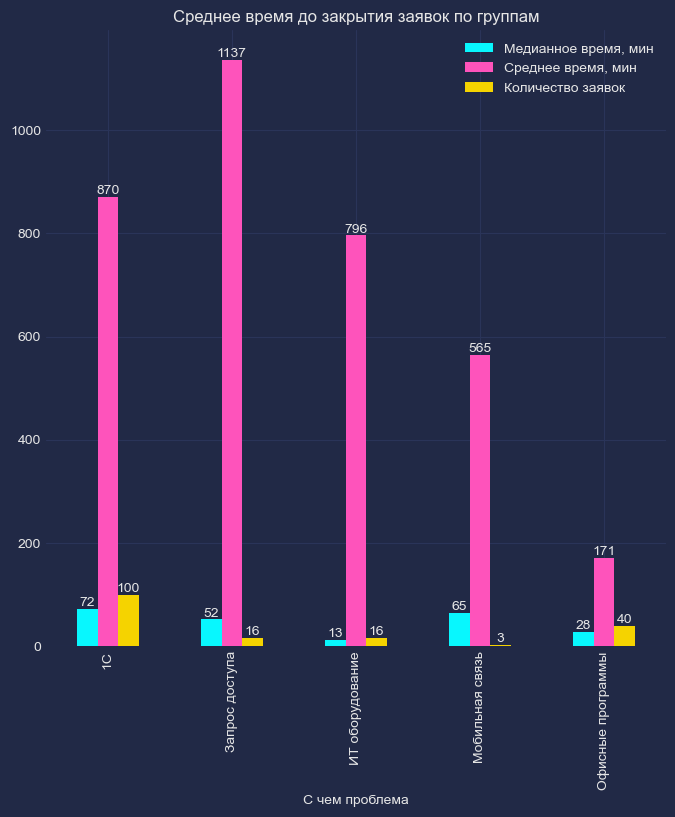

In [30]:
with plt.style.context('cyberpunk'):
    ax = processing_time.plot(x='С чем проблема', kind='bar', figsize=(8,8))
    ax.set_title('Среднее время до закрытия заявок по группам')
    plt.bar_label(ax.containers[0])
    plt.bar_label(ax.containers[1])
    plt.bar_label(ax.containers[2])
    plt.show()

Построим аналогичное распределение по отделам. Создадим сводную таблицу с количеством заявок и средним временем обработки:

In [31]:
dep_pivot = data_after.pivot_table(index='department',
                                   values='delta',
                                   aggfunc=['count', 'median']).reset_index()
dep_pivot.columns = ['Подразделение', 'Количество заявок', 'Среднее время до завершения, мин']

In [32]:
dep_pivot.sort_values(by='Количество заявок', ascending=False)

,Подразделение,Количество заявок,"Среднее время до завершения, мин"
9,Parts,58,69.5
0,Accounting,35,43.0
12,Warranty and Aftersales service,14,19.5
3,Development,13,17.0
13,Whole goods,13,39.0
5,HR,8,46.0
7,Legal,7,228.0
6,IT,6,21.5
4,Finance controlling,5,44.0
2,Chelny,4,1443.0


Наибольшее количество заявок за прошедшие две недели пришло от подразделения `Parts`. Это было связано с запросами на восстановление дилерских аккаунтов в тонком клиенте PSOP.

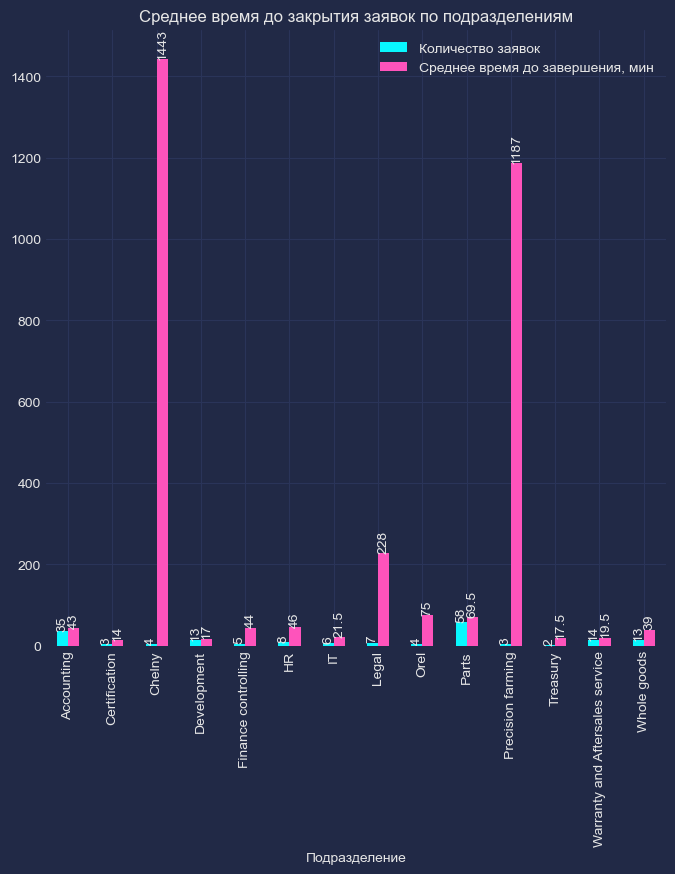

In [33]:
with plt.style.context('cyberpunk'):
    ax = dep_pivot.plot(x='Подразделение', kind='bar', figsize=(8,8))
    ax.set_title('Среднее время до закрытия заявок по подразделениям')
    plt.bar_label(ax.containers[0], rotation=90)
    plt.bar_label(ax.containers[1], rotation=90)
    plt.show()

Заявки из Набережных Челнов попали в выбросы. Их всего 4, посмотрим, что там:

In [34]:
data_after.query('department == "Chelny"')

,task_id,group,database,problem,email,subject,creation_date,step,step_with_aligner,overdue,...,resource,equipment,software,phone,initiator_email,department,status,executor,result,delta
127,173323543,1C,Другое,В 1С UPP Недостаточно прав для отражения в рег...,andrey.mishagin@uind.ru,В 1С UPP Недостаточно прав для отражения в рег...,2023-07-05 14:46:00,2,2: in progress (Максим Фостиков),Нет,...,NaN,NaN,NaN,7.960071e+10,andrey.mishagin@uind.ru,Chelny,Новая,NaN,Готово,6.0
195,173056718,Запрос доступа,NaN,необходим ID ключ для входа в аккаунт,andrey.mishagin@uind.ru,Яндекс ключ,2023-07-03 14:36:00,2,2: in progress (Максим Фостиков),Нет,...,Удаленный рабочий стол,NaN,NaN,7.960071e+10,andrey.mishagin@uind.ru,Chelny,Решена,NaN,"яндекс ключ настроен, на смартфоне выставлена ...",1475.0
202,173021649,1C,Approval workflows,не заполняются графы Payment type и Division в...,andrey.mishagin@uind.ru,не заполняются графы в P23/0001192,2023-07-03 11:14:00,2,2: in progress (Андрей Щербаков),Нет,...,NaN,NaN,NaN,7.960071e+10,andrey.mishagin@uind.ru,Chelny,Решена,Евгения Ермакова,Предоставлен доступ к типу платежа SGA,1438.0
205,173020188,1C,Approval workflows,не возможно отправить Payment request. Ошибка ...,anatoliy.agafoncev@uind.ru,не возможно отправить Payment request,2023-07-03 11:05:00,2,2: in progress (Максим Фостиков),Нет,...,NaN,NaN,NaN,7.960071e+10,anatoliy.agafoncev@uind.ru,Chelny,Решена,Евгения Ермакова,Предоставлен доступ к типу платежа SGA,1448.0


Самые долгие заявки - `#173020188` и `#173021649`. Время растянулось, т.к. ждали согласования по типам платежей в AWF. 

По времени явно есть выбросы, которые возникли из-за зависших задач, связанных с разработкой нового функционала или по другим причинам. Отфильтруем их для лучшей визуализации.

Проверим, до какой границы располагаются выбросы:

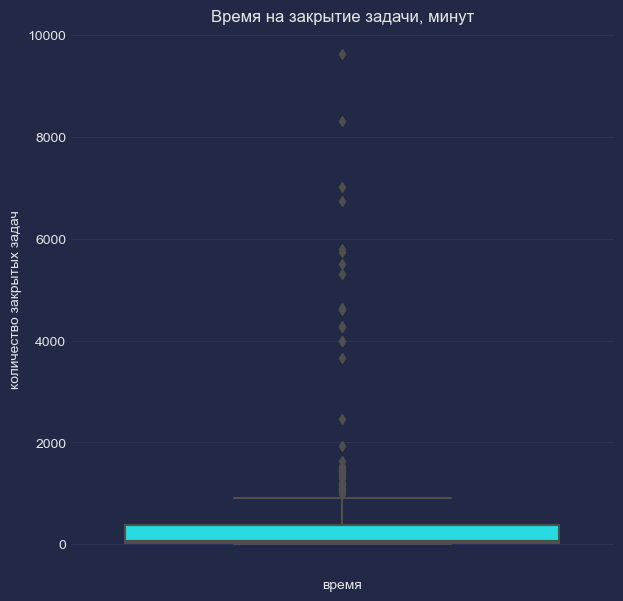

In [35]:
with plt.style.context('cyberpunk'):
    fig,ax = plt.subplots(figsize=(7,7))
    sns.boxplot(y=data_after['delta'])
    ax.set_title('Время на закрытие задачи, минут')
    ax.set_xlabel('время')
    ax.set_ylabel('количество закрытых задач')
    plt.show()

In [36]:
data_after['delta'].describe()

count     175.000000
mean      722.537143
std      1635.675202
min         1.000000
25%        15.000000
50%        54.000000
75%       376.000000
max      9629.000000
Name: delta, dtype: float64

Проверим, в каких пределах лежит 95% и 99% значений:

In [37]:
data_after['delta'] = data_after['delta'].fillna(0)

In [38]:
print('95% значений:', np.percentile(data_after['delta'], 95).round())
print('99% значений:', np.percentile(data_after['delta'], 99).round())

95% значений: 4336.0
99% значений: 7059.0


Количество записей до фильтрации:

In [39]:
data_after.shape

(198, 23)

Возьмем в качестве границы время 6,5ч (400 мин), т.к. 75% значений находятся в этих пределах.

In [40]:
data_after = data_after.query('delta <= 400')

In [41]:
data_after.shape

(154, 23)

Строим обновленную таблицу по времени обработки заявок:

In [42]:
processing_time_new = data_after.pivot_table(index='group',
                                             values='delta',
                                             aggfunc=['median', 'mean', 'count']).round(2).reset_index()
processing_time_new.columns = ['С чем проблема',
                               'Медианное время после изменений, мин',
                               'Среднее время после изменений, мин',
                               'Количество заявок после изменений']

In [43]:
processing_time_new.sort_values(by='Медианное время после изменений, мин', ascending=False)

,С чем проблема,"Медианное время после изменений, мин","Среднее время после изменений, мин",Количество заявок после изменений
3,Мобильная связь,33.5,33.50,2
0,1C,28.0,47.20,90
4,Офисные программы,28.0,33.84,37
1,Запрос доступа,15.0,30.36,11
2,ИТ оборудование,6.0,53.36,14


Строим обновленный график по времени обработки:

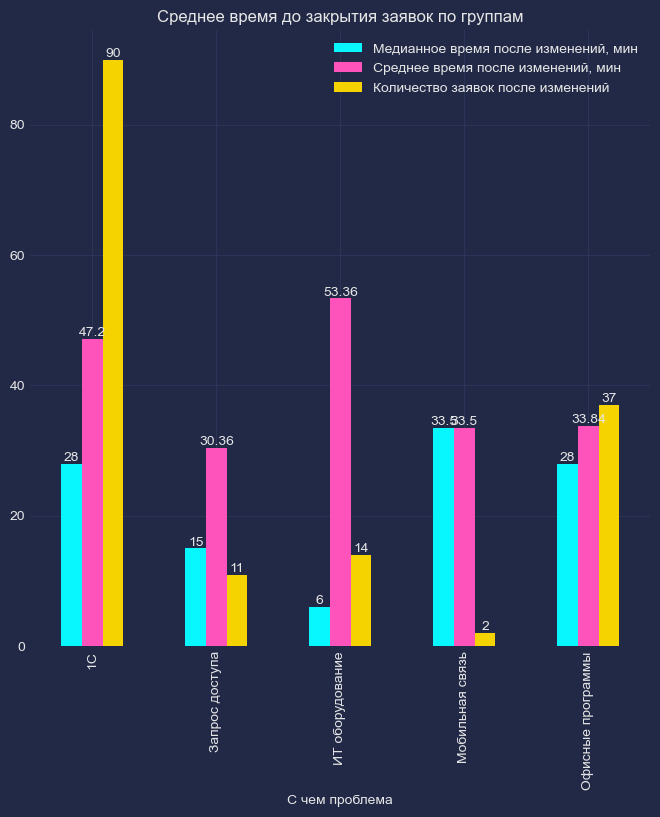

In [44]:
with plt.style.context('cyberpunk'):
    ax = processing_time_new.plot(x='С чем проблема', kind='bar', figsize=(8,8))
    ax.set_title('Среднее время до закрытия заявок по группам')
    plt.bar_label(ax.containers[0], rotation=0)
    plt.bar_label(ax.containers[1], rotation=0)
    plt.bar_label(ax.containers[2], rotation=0)
    plt.show()

### Распределение по базам 1С:

In [132]:
bases = data_after.query('group == "1C"')
bases.shape

(90, 23)

In [138]:
bases_pivot = bases.pivot_table(index='database',
                               values='task_id',
                               aggfunc=['count']).reset_index()
bases_pivot.columns = ['База', 'Количество заявок']

In [139]:
bases_pivot =  bases_pivot.sort_values(by='Количество заявок', ascending=False)
bases_pivot

,База,Количество заявок
2,PSOP,50
4,Другое,16
0,Approval workflows,12
3,Trade Management,8
1,CPM,3


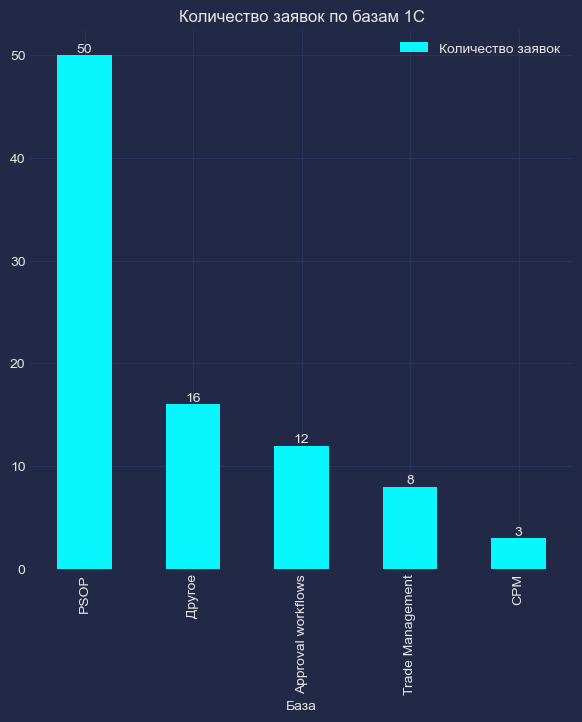

In [140]:
with plt.style.context('cyberpunk'):
    ax = bases_pivot.plot(x='База',
                                     y='Количество заявок',
                                        kind='bar', figsize=(7,7))
    ax.set_title('Количество заявок по базам 1С')
    plt.bar_label(ax.containers[0], rotation=0)
    plt.show()

Обновленная таблица по подразделениям:

In [45]:
dep_pivot_new = data_after.pivot_table(index='department',
                                       values='delta',
                                       aggfunc=['count', 'median']).round(2).reset_index()
dep_pivot_new.columns = ['Подразделение',
                         'Количество заявок после изменений',
                         'Среднее время до завершения после изменений, мин']

In [46]:
dep_pivot_new.sort_values(by='Количество заявок после изменений', ascending=False)

,Подразделение,Количество заявок после изменений,"Среднее время до завершения после изменений, мин"
9,Parts,51,29.0
0,Accounting,32,23.5
12,Warranty and Aftersales service,14,9.5
13,Whole goods,13,11.0
3,Development,10,5.5
6,IT,6,21.5
4,Finance controlling,5,21.0
5,HR,5,14.0
7,Legal,5,103.0
11,Treasury,4,1.5


Здесь изменилось только среднее время на обработку обращений. Обновленный график:

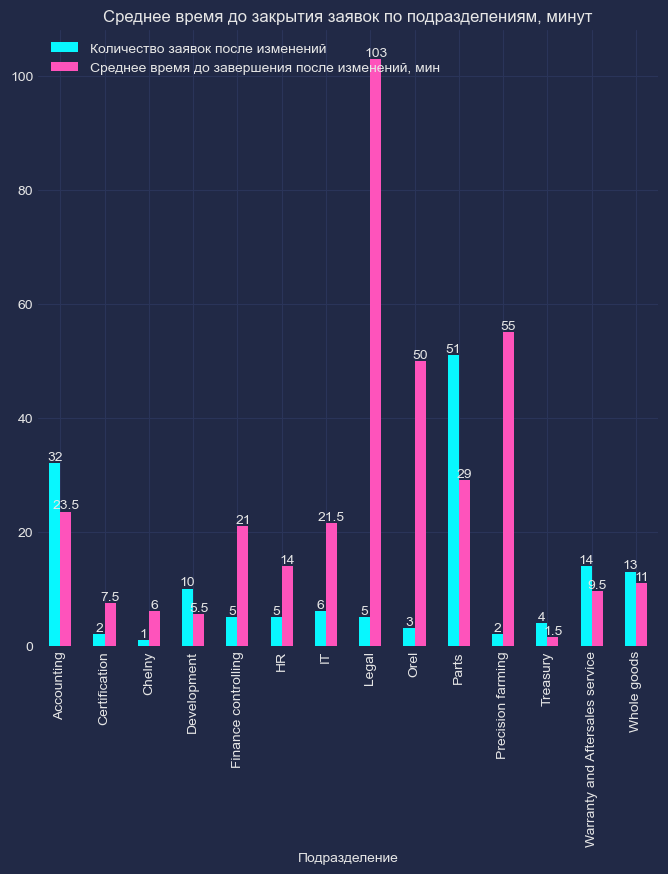

In [128]:
with plt.style.context('cyberpunk'):
    ax = dep_pivot_new.plot(x='Подразделение', kind='bar', figsize=(8,8))
    ax.set_title('Среднее время до закрытия заявок по подразделениям, минут')
    plt.bar_label(ax.containers[0], rotation=0)
    plt.bar_label(ax.containers[1], rotation=0)
    ax.legend(loc='upper left')
    plt.show()

По одиночным заявкам время сильно выбивается. Это заявки от юр. отдела и точного земледелия:

In [48]:
data_after.query('(department == "Legal") | (department == "Precision farming")')

,task_id,group,database,problem,email,subject,creation_date,step,step_with_aligner,overdue,...,resource,equipment,software,phone,initiator_email,department,status,executor,result,delta
50,174001111,1C,Approval workflows,"Коллеги, \t1. ГД согласовал подписание ЭП д...",oleg.petukhov@uind.ru,срочный запрос,2023-07-11 12:13:00,2,2: in progress (Максим Фостиков),Нет,...,NaN,NaN,NaN,7.916016e+10,oleg.petukhov@uind.ru,Legal,Решена,Евгения Ермакова,Пользователь решил вопрос самостоятельно,54.0
51,174000830,Офисные программы,NaN,Прошу помочь установить приложение WeChat на н...,alexander.dyagilev@uind.ru,Приложение WeChat,2023-07-11 12:11:00,2,2: in progress (Максим Фостиков),Нет,...,NaN,NaN,Другое,7.916823e+10,alexander.dyagilev@uind.ru,Precision farming,Решена,Максим Фостиков,установлено,110.0
85,173605187,Офисные программы,NaN,"Коллеги, как подключиться к серверу? Где мои д...",maria.putintseva@uind.ru,подключение ноутбука,2023-07-07 15:33:00,2,2: in progress (Максим Фостиков),Нет,...,NaN,NaN,VPN,NaN,maria.putintseva@uind.ru,Legal,Решена,NaN,"настроен аутентификатор, базы, удаленный раб стол",35.0
166,173195888,1C,PSOP,Присвоить номенклатурную группу для артикулов ...,alexander.dyagilev@uind.ru,Присвоить номенклатурную группу ПСТ,2023-07-04 15:07:00,2,2: in progress (Андрей Щербаков),Нет,...,NaN,NaN,NaN,7.916823e+10,alexander.dyagilev@uind.ru,Precision farming,В работе,Андрей Татарченков,NaN,0.0
172,173166148,Офисные программы,NaN,"Добрый день, Просьба помочь с входом в личный ...","oleg.petukhov@uind.ru,anton.kuznetsov@uind.ru,...",RE: ПО для подачи заявлений в ЕГРЮЛ,2023-07-04 12:12:00,2,2: in progress (Максим Фостиков),Нет,...,NaN,NaN,Другое,7.916016e+10,oleg.petukhov@uind.ru,Legal,Решена,Максим Фостиков,"проблема со стороны ресурса, все настройки вып...",103.0
206,173016481,1C,Approval workflows,В соответствии с приказом Банка России наимен...,oleg.petukhov@uind.ru,Заменить аббревиатуру валюты RUR - RUB,2023-07-03 10:45:00,2,2: in progress (Андрей Щербаков),Нет,...,NaN,NaN,NaN,7.999123e+10,oleg.petukhov@uind.ru,Legal,Новая,Сергей Шепелев,Готово,347.0
216,172715725,ИТ оборудование,NaN,"Добрый день, коллеги. У меня комп периодически...","maria.putintseva@cnhind.com,anton.kuznetsov@iv...",FW: UserIDs expiring in 30 days / UserID in sc...,2023-06-30 10:30:00,2,2: in progress (Андрей Щербаков),Нет,...,NaN,Другое,NaN,NaN,maria.putintseva@uind.ru,Legal,Решена,Андрей Щербаков,"ООО ""Юнайтед Индастриал"" не обслуживает устрой...",228.0


Распределение по исполнителям не смотрела, т.к. это видно в Pyrus, к тому же, за прошедший период оно сильно искажено.

## Данные до внесения изменений

До внедрения изменений:
- в форме отсутствовали поля для электронной почты инициатора и подразделения, соответственно, подразделение в этих заявках не заполнено;
- были иначе настроены SLA, поэтому критерий "просрочено / не просрочено" может быть другим;

При этом у нас все равно есть время создания и завершения задачи - можем рассчитать время обработки. И есть электронная почта сотрудника, отправившего заявку, поэтому подразделение можно также заполнить по словарю.  
Поскольку часто сотрудники при отправке заявки ставят в копию других сотрудников, в заявке может быть несколько электронных адресов. При этом электронная почта сотрудника, отправившего заявку, всегда будет стоять на первом месте.

Сначала отфильтруем даты после 29 июня, чтобы оставить только данные до изменений:

In [49]:
data_before = data.query('creation_date < "2023-06-29"').copy()

In [50]:
data_before.shape

(760, 23)

Создаем словарь для подразделений:

In [51]:
deps = {
    'irina.orlova@uind.ru': 'HR',
    'accounting@uind.ru': 'Accounting',
    'aleksandr.makarov@uind.ru': 'Development',
    'alexander.akimov@uind.ru': 'Orel',
    'alexander.biryulin@uind.ru': 'Warranty and Aftersales service',
    'alexander.dolgov@uind.ru': 'Development',
    'alexander.dyagilev@uind.ru': 'Precision farming',
    'alexander.zaginaylov@uind.ru': 'Whole goods',
    'alexey.bugrov@uind.ru': 'Warranty and Aftersales service',
    'alexey.gushchin@uind.ru': 'Whole goods',
    'alexey.petukhov@uind.ru': 'Certification',
    'alexey.tyumakov@uind.ru': 'Development',
    'alexey.zelenkov@uind.ru': 'Parts',
    'alfiya.timirgalieva@uind.ru': 'Chelny',
    'alina.dosycheva@uind.ru': 'Finance controlling',
    'alina.efremyan@uind.ru': 'Parts',
    'anatoliy.agafoncev@uind.ru': 'Chelny',
    'anatoliy.nam@uind.ru': 'Parts',
    'andrejs.lazebniks@uind.ru': 'Development',
    'andrey.mishagin@uind.ru': 'Chelny',
    'andrey.shcherbakov@uind.ru': 'IT',
    'andrey.shebotinov@uind.ru': 'Whole goods',
    'andrey.spitsyn@uind.ru': 'IT',
    'andrey.tatarchenkov@uind.ru': 'IT',
    'anfis.sadriev@uind.ru': 'Chelny',
    'anna.andriyashina@uind.ru': 'HR',
    'anna.arefyeva@uind.ru': 'Finance controlling',
    'anna.semenova@uind.ru': 'Parts',
    'anton.kuznetsov@uind.ru': 'IT',
    'anton.soshnev@uind.ru': 'Whole goods',
    'aslan.umarov@uind.ru': 'Management',
    'azat.khalimov@uind.ru': 'Chelny',
    'boris.tsybakov@uind.ru': 'Whole goods',
    'denis.bousel@uind.ru': 'Whole goods',
    'denis.chastilov@uind.ru': 'Precision farming',
    'dinar.bogdanov@uind.ru': 'Chelny',
    'dmitriy.zabolotnyi@uind.ru': 'Whole goods',
    'dmitry.chernyavskiy@uind.ru': 'Warranty and Aftersales service',
    'dmitry.matveev@uind.ru': 'Warranty and Aftersales service',
    'dmitry.rakov@uind.ru': 'IT',
    'dmitry.sidorov@uind.ru': 'Whole goods',
    'eduard.bairashev@uind.ru': 'Chelny',
    'elena.akyatan@uind.ru': 'Parts',
    'elena.tikhova@uind.ru': 'Finance controlling',
    'elena.yazykova@uind.ru': 'Accounting',
    'eugeniy.anashkin@uind.ru': 'Whole goods',
    'evgeniya.ermakova@uind.ru': 'IT',
    'evgeniya.ivanova@uind.ru': 'Accounting',
    'gennadiy.kartashilov@uind.ru': 'Parts',
    'gulnara.serebrova@uind.ru': 'Warranty and Aftersales service',
    'hr@uind.ru': 'HR',
    'ilya.burgov@uind.ru': 'Finance controlling',
    'inna.martini@uind.ru': 'Whole goods',
    'irina.bondarenko@uind.ru': 'Treasury',
    'irina.maneeva@uind.ru': 'HR',
    'irina.savonina@uind.ru': 'Accounting',
    'kirill.kokosinskiy@uind.ru': 'Parts',
    'konstantin.lebedev@uind.ru': 'HR',
    'kristina.sharakina@uind.ru': 'Warranty and Aftersales service',
    'legal@uind.ru': 'Legal',
    'mansur.galiev@uind.ru': 'Warranty and Aftersales service',
    'marat.akhmetov@uind.ru': 'IT',
    'maria.alvarez@uind.ru': 'Parts',
    'maria.larina@uind.ru': 'Parts',
    'maria.putintseva@uind.ru': 'Legal',
    'maria.sorokina@uind.ru': 'Parts',
    'maxim.fostikov@uind.ru': 'IT',
    'maxim.karlagin@uind.ru': 'Parts',
    'maxim.vasin@uind.ru': 'Precision farming',
    'mikhail.murakhovskiy@uind.ru': 'Management',
    'mikhail.prokhorov@uind.ru': 'Development',
    'mikhail.valeev@uind.ru': 'Orel',
    'nadezhda.busygina@uind.ru': 'Parts',
    'natalia.ryabina@uind.ru': 'Parts',
    'nicholay.ryzhkov@uind.ru': 'Warranty and Aftersales service',
    'nikolay.sergienko@uind.ru': 'Development',
    'oleg.khudokormov@uind.ru': 'Chelny',
    'oleg.kolnobritskiy@uind.ru': 'Development',
    'oleg.petukhov@uind.ru': 'Legal',
    'olga.akimova@uind.ru': 'Orel',
    'olga.aranovskaya@uind.ru': 'HR',
    'tatiana.gornistova@uind.ru': 'HR',
    'olga.bozhdankevich@uind.ru': 'HR',
    'olga.kerbabaeva@uind.ru': 'Development',
    'pavel.zemtsov@uind.ru': 'Whole goods',
    'roman.bikmukhametov@uind.ru': 'Whole goods',
    'roman.semakin@uind.ru': 'Orel',
    'sergey.kardashevskiy@uind.ru': 'Chelny',
    'sergey.morokhov@uind.ru': 'Whole goods',
    'sergey.plakhtiy@uind.ru': 'Parts',
    'sergey.shepelev@uind.ru': 'IT',
    'service@uind.ru': 'Warranty and Aftersales service',
    'sofia.pobazheeva@uind.ru': 'HR',
    'sofia.yagudina@uind.ru': 'Accounting',
    'svetlana.zhelobaeva@uind.ru': 'Accounting',
    'tatiana.vinogradova@uind.ru': 'Accounting',
    'tatiana.yastrebova@uind.ru': 'Certification',
    'tatyana.gayazova@uind.ru': 'Chelny',
    'tatyana.izman@uind.ru': 'Whole goods',
    'tatyana.popova@uind.ru': 'HR',
    'vadim.burdovitsyn@uind.ru': 'Warranty and Aftersales service',
    'vera.boshkovich@uind.ru': 'Whole goods',
    'vladimir.bulanov@uind.ru': 'Parts',
    'vladimir.kiryukhin@uind.ru': 'Warranty and Aftersales service',
    'warranty@uind.ru': 'Warranty and Aftersales service',
    'yulay.bikbulatov@uind.ru': 'Finance controlling'
}

Создадим столбец для первого `email`. Разбиваем каждую строку на отдельные email:

In [52]:
# заменяем все возможные разделители на пробел
# здесь я очень долго искала непечатные символы, опытным путем выяснено, что юникод портит все
# \\ вот это делает вид, что оно пробел
# еще есть \, оно выдает ошибку про незакрытый строковый литерал. По факту, это проблема выгрузки из Pyrus,
# возможно она решится, если брать данные не экспортом из Pyrus, а напрямую из хранилища
data_before['email'] = data_before['email'].str.replace('\\', '')
data_before['email'] = data_before['email'].str.replace(',', ' ')
data_before['email'] = data_before['email'].str.replace(', ', ' ')
data_before['email'] = data_before['email'].str.replace('  ', ' ')

C:\Users\evgeniya.ermakova\AppData\Local\Temp\ipykernel_14860\1911168079.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_before['email'] = data_before['email'].str.replace('\\', '')


In [53]:
# убираем все email, кроме первого объекта
# из-за проблем с кодировкой, это может быть не один email, отфильтруем дальше
for i in data_before['email']:
    data_before['email'] = data_before['email'].str.replace(i, i.split(' ', 1)[0])

C:\Users\evgeniya.ermakova\AppData\Local\Temp\ipykernel_14860\1856592555.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data_before['email'] = data_before['email'].str.replace(i, i.split(' ', 1)[0])


Перед заполнением столбца с подразделением нужно учесть, что до перехода на новый домен использовался домен `cnhind.com`, его нужно заменить на актуальный. Имена пользователей при этом не менялись.  
Также возможно, что где-то в написании `email` встречаются заглавные буквы, тогда это будет считаться двумя разными почтовыми адресами. Приведем столбец `email` к нижнему регистру.

In [54]:
data_before['email'] = data_before['email'].apply(lambda x: x.lower())

In [55]:
data_before['email'] = data_before['email'].str.replace('cnhind.com', 'uind.ru')
data_before['email'] = data_before['email'].str.replace('external.cnhind.com', 'uind.ru')

C:\Users\evgeniya.ermakova\AppData\Local\Temp\ipykernel_14860\3547834048.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_before['email'] = data_before['email'].str.replace('cnhind.com', 'uind.ru')
C:\Users\evgeniya.ermakova\AppData\Local\Temp\ipykernel_14860\3547834048.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_before['email'] = data_before['email'].str.replace('external.cnhind.com', 'uind.ru')


Получаем все email:

In [56]:
data_before['first_email'] = data_before['email'].apply(lambda x: re.search(r'[\w.+-]+@[\w-]+\.[\w.-]+', x))

Окончательно выделяем только первый email в полученной строке:

In [57]:
data_before['email'] = data_before['email'].apply(lambda x: x.split(' ', 1)[0])

Заполняем столбец с подразделением по словарю:

In [58]:
data_before['department'] = data_before['department'].fillna(data_before['email'])
data_before['department'] = data_before['department'].replace(deps)

Проверка уникальных значений в столбце `department`:

In [59]:
data_before['department'].unique()

array(['IT', 'Treasury', 'Parts', 'HR', 'Finance controlling',
       'Whole goods', 'Certification', 'Warranty and Aftersales service',
       'Legal', 'Accounting', 'andrey.makarov@uind.ru',
       'Precision farming', 'Chelny', 'Development', 'Orel', 'Management',
       'ce.service.russia@uind.ru', 'nikolay.kuklin@uind.ru',
       'mailer-daemon@uind.ru', 'kgricenko@mail.ru', 'dealex81@mail.ru',
       'kirill.lavrentyev777@yandex.ru', 'irina.spektor@uind.ru',
       'kirill.lavrentyev@uind.ru', 'alexander.demyanchik@uind.ru',
       'valeria.kopyrkina@uind.ru', 'vladimir.sheremetiev@uind.ru',
       'ekaterina.solkina@uind.ru', 'vera.perepletchikova@uind.ru',
       'светлана', 'maxim.lukyanov@uind.ru', 'irina.sklyadneva@uind.ru',
       'ictsystemsrussia@uind.ru', 'irina.orlova@external.uind.ru',
       'cnhparts.cs@uind.ru', 'svetlana.zhelobaeva@external.uind.ru',
       'dmitry.volkov@uind.ru', 'vladimir.doubrovskiy@uind.ru',
       'ilnaz.davletov@uind.ru', 'tatyana.bronnikova

Полностью вычистить данные не удалось Поскольку взяты данные за весь период действия формы, в список попали недействительные адреса уволенных сотрудников, отфильтруем их. Количество строк до фильтрации:

In [60]:
data_before.shape

(760, 24)

In [61]:
departs = {'IT',
           'Treasury',
           'Parts',
           'HR',
           'Finance controlling',
           'Whole goods',
           'Certification',
           'Warranty and Aftersales service',
           'Legal',
           'Accounting',
          'Precision farming',
          'Chelny',
          'Development'}

In [62]:
data_before = data_before.query('department in @departs')

In [63]:
data_before.shape

(659, 24)

Потеряли 10% от датасета.

### Сравнение распределений до и после изменений

#### Время на обработку задачи

Проверим, где располагаются выбросы - слишком большое или слишком маленькое время:

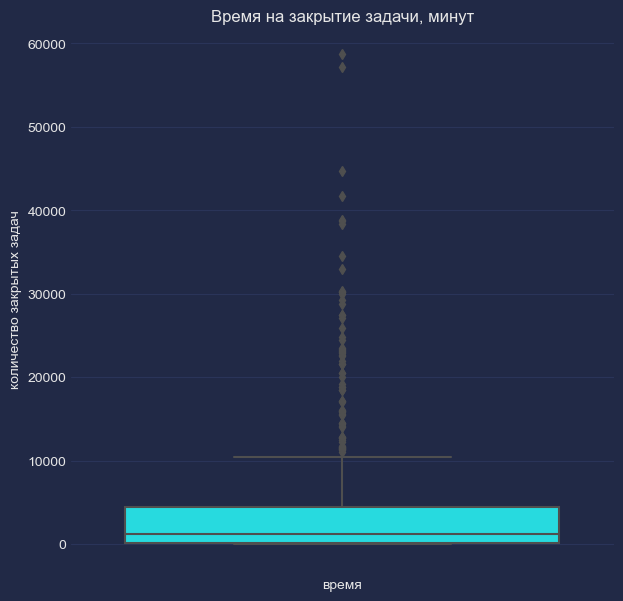

In [64]:
with plt.style.context('cyberpunk'):
    fig,ax = plt.subplots(figsize=(7,7))
    sns.boxplot(y=data_before['delta'])
    ax.set_title('Время на закрытие задачи, минут')
    ax.set_xlabel('время')
    ax.set_ylabel('количество закрытых задач')
    plt.show()

In [65]:
data_before['delta'].describe()

count      650.000000
mean      4147.060000
std       7522.331254
min          1.000000
25%         86.250000
50%       1188.500000
75%       4467.250000
max      58726.000000
Name: delta, dtype: float64

Как и в выборке после внедрения изменений, время на обработку задач очень разрозненное, начиная от нескольких секунд до 40 дней (58725 минут). Три четверти заявок (75%) были закрыты за 75 часов - это три дня. Просчитаем, на какой границе находится 95% и 99% значений:

In [66]:
data_before['delta'] = data_before['delta'].fillna(0)

In [67]:
perc_95 = np.percentile(data_before['delta'], 95).round().astype('int')
perc_99 = np.percentile(data_before['delta'], 99).round().astype('int')

In [68]:
print('95% значений, минут:', perc_95)
print('95% значений, дней:', (perc_95 / 60 / 24).round())
print('99% значений, минут:', perc_99)
print('99% значений, дней:', (perc_99 / 60 / 24).round())

95% значений, минут: 20477
95% значений, дней: 14.0
99% значений, минут: 36144
99% значений, дней: 25.0


Данные очень разбросанные, проверим также 85%:

In [69]:
perc_85 = np.percentile(data_before['delta'], 85).round().astype('int')
print('85% значений, минут:', perc_85)
print('85% значений, дней:', (perc_85 / 60 / 24).round())

85% значений, минут: 8691
85% значений, дней: 6.0


Поступим с ними аналогичным образом - отфильтруем. Оставим здесь 75% значений:

In [70]:
data_before = data_before.query('delta <= 5000').copy()

In [71]:
data_before.shape

(501, 24)

Проверим, есть ли незакрытые задачи среди этих данных:

In [72]:
print('Количество открытых задач:', data_before['end_date'].isna().sum())

Количество открытых задач: 9


In [73]:
data_before_closed = data_before[~data_before['end_date'].isna()]
data_before_closed = data_before_closed.query('delta != 0')

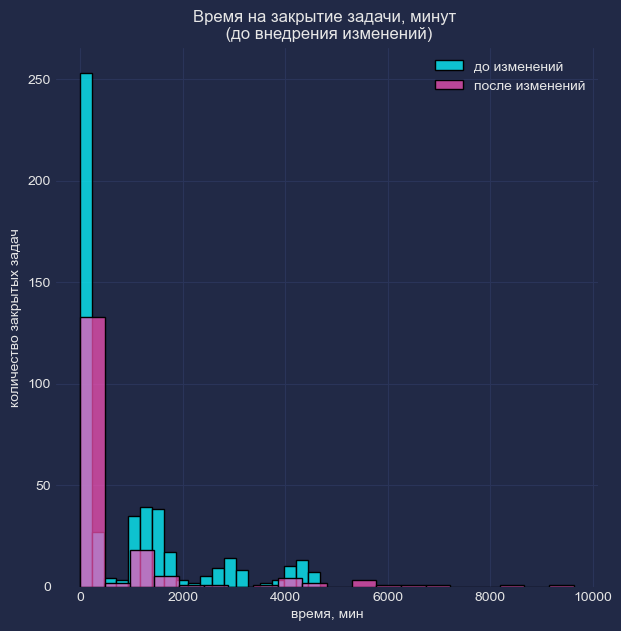

In [74]:
with plt.style.context('cyberpunk'):
    fig,ax = plt.subplots(figsize=(7,7))
    sns.histplot(data_before_closed['delta'], bins=20, label='до изменений')
    sns.histplot(data_after_closed['delta'], bins=20, alpha=0.7, label='после изменений')
    ax.set_title('Время на закрытие задачи, минут \n (до внедрения изменений)')
    ax.set_xlabel('время, мин')
    ax.set_ylabel('количество закрытых задач')
    ax.legend()
    plt.show()

В целом распределение не сильно изменилось, говорить о сокращении времени обработки пока рано. 

### Распределение по отделам

Соберем среднее время обрабртки обращений по отделам в сводную таблицу и объединим с данными после изменений.

У нас маленький период исследования после внедрения изменений, к тому же был всплеск "быстрых" заявок в это время. Если брать весь датасет "до изменений", это не покажет ничего. Возьмем данные за предыдущие две недели - с 14 июня по 28 июня:

In [75]:
month_before = data_before.query('"2023-06-14" < creation_date < "2023-06-28"')

In [76]:
processing_time_before = month_before.pivot_table(index='group',
                                             values='delta',
                                             aggfunc=['median', 'mean', 'count']).round(2).reset_index()
processing_time_before.columns = ['С чем проблема',
                                  'Медианное время до изменений, мин',
                                  'Среднее время до изменений, мин',
                                  'Количество заявок до изменений']

In [77]:
processing_time_before = processing_time_before.merge(processing_time_new, how='left', on='С чем проблема')

In [78]:
processing_time_before

,С чем проблема,"Медианное время до изменений, мин","Среднее время до изменений, мин",Количество заявок до изменений,"Медианное время после изменений, мин","Среднее время после изменений, мин",Количество заявок после изменений
0,1C,1146.5,1403.31,42,28.0,47.20,90
1,Запрос доступа,110.0,765.24,21,15.0,30.36,11
2,ИТ оборудование,55.0,250.18,11,6.0,53.36,14
3,Мобильная связь,1817.0,1817.00,2,33.5,33.50,2
4,Офисные программы,42.0,297.11,37,28.0,33.84,37


Здесь разница по времени значительная.

In [79]:
processing_time_before = processing_time_before[[
    'С чем проблема',
    'Количество заявок до изменений',
    'Медианное время до изменений, мин',
    'Количество заявок после изменений',
    'Медианное время после изменений, мин'
]]

In [80]:
processing_time_before

,С чем проблема,Количество заявок до изменений,"Медианное время до изменений, мин",Количество заявок после изменений,"Медианное время после изменений, мин"
0,1C,42,1146.5,90,28.0
1,Запрос доступа,21,110.0,11,15.0
2,ИТ оборудование,11,55.0,14,6.0
3,Мобильная связь,2,1817.0,2,33.5
4,Офисные программы,37,42.0,37,28.0


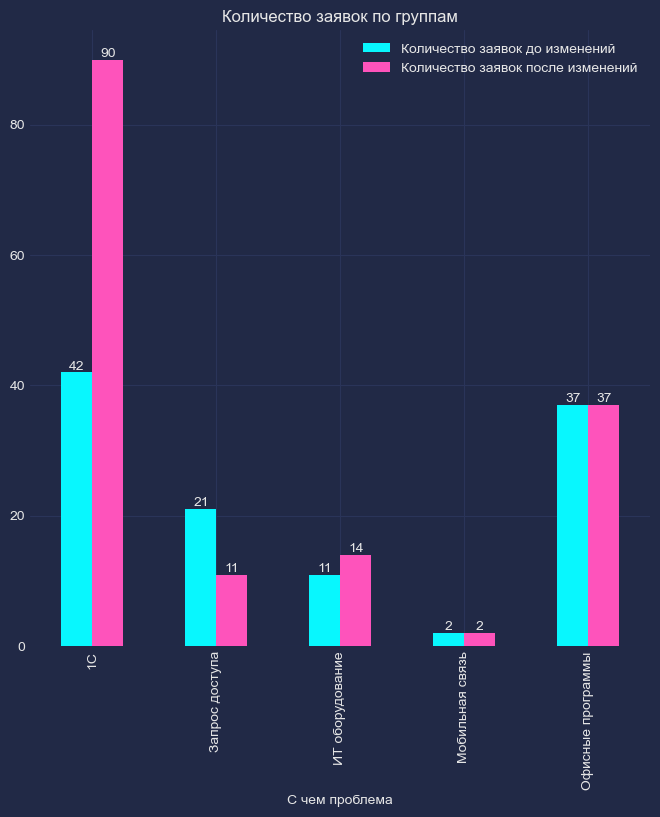

In [81]:
with plt.style.context('cyberpunk'):
    ax = processing_time_before.plot(x='С чем проблема',
                                     y=['Количество заявок до изменений', 'Количество заявок после изменений'],
                                        kind='bar', figsize=(8,8))
    ax.set_title('Количество заявок по группам')
    plt.bar_label(ax.containers[0], rotation=0)
    plt.bar_label(ax.containers[1], rotation=0)
    plt.show()

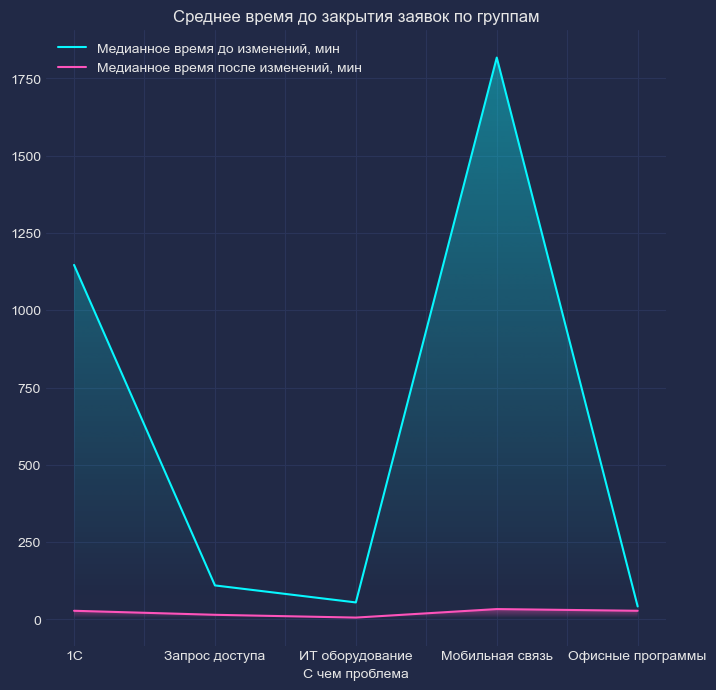

In [82]:
with plt.style.context('cyberpunk'):
    ax = processing_time_before.plot(x='С чем проблема',
                                     y=['Медианное время до изменений, мин', 'Медианное время после изменений, мин'],
                                        kind='line', figsize=(8,8))
    ax.set_title('Среднее время до закрытия заявок по группам')
    mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.4)
#     plt.bar_label(ax.containers[0], rotation=0)
#     plt.bar_label(ax.containers[1], rotation=0)
    plt.show()

Из-за специфики последних двух недель, сравнение по времени по группам не показательно.

In [83]:
dep_pivot_before = data_before.pivot_table(index='department',
                                       values='delta',
                                       aggfunc=['count', 'median']).round(2).reset_index()
dep_pivot_before.columns = ['Подразделение',
                            'Количество заявок до изменений',
                            'Среднее время до завершения до изменений, мин']

In [84]:
dep_pivot_before = dep_pivot_before.merge(dep_pivot_new, how='left', on='Подразделение')

In [85]:
dep_pivot_before['Время на одну заявку до'] = (
    dep_pivot_before['Среднее время до завершения до изменений, мин'] / dep_pivot_before['Количество заявок до изменений']
).round(2)
dep_pivot_before['Время на одну заявку после'] = (
    dep_pivot_before['Среднее время до завершения после изменений, мин'] / dep_pivot_before['Количество заявок после изменений']
).round(2)

In [86]:
dep_pivot_before.sort_values(by='Количество заявок до изменений', ascending=False)

,Подразделение,Количество заявок до изменений,"Среднее время до завершения до изменений, мин",Количество заявок после изменений,"Среднее время до завершения после изменений, мин",Время на одну заявку до,Время на одну заявку после
8,Parts,109,246.0,51,29.0,2.26,0.57
0,Accounting,92,204.0,32,23.5,2.22,0.73
5,HR,69,86.0,5,14.0,1.25,2.80
12,Whole goods,44,174.5,13,11.0,3.97,0.85
4,Finance controlling,40,409.0,5,21.0,10.22,4.20
6,IT,37,84.0,6,21.5,2.27,3.58
7,Legal,34,1098.5,5,103.0,32.31,20.60
11,Warranty and Aftersales service,27,161.0,14,9.5,5.96,0.68
3,Development,18,222.0,10,5.5,12.33,0.55
2,Chelny,9,1190.0,1,6.0,132.22,6.00


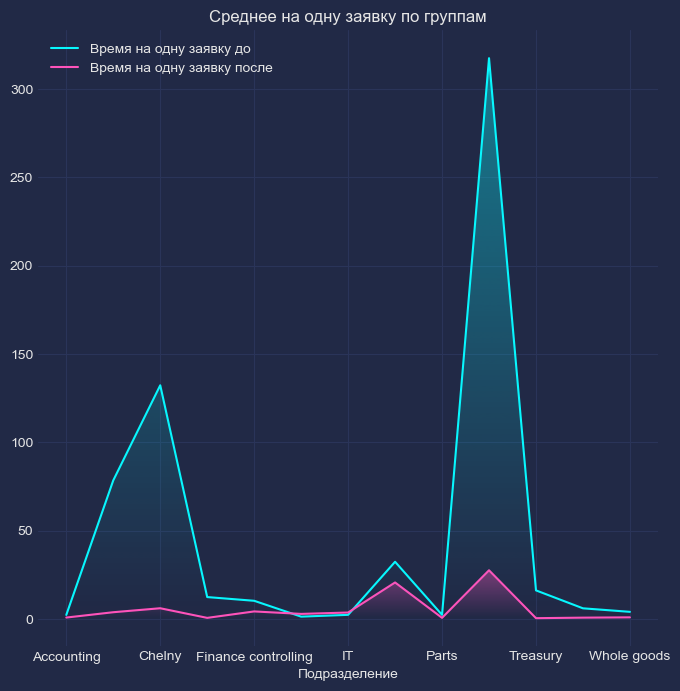

In [89]:
with plt.style.context('cyberpunk'):
    ax = dep_pivot_before.plot(x='Подразделение',
                                     y=['Время на одну заявку до', 'Время на одну заявку после'],
                                        kind='line', figsize=(8,8))
    ax.set_title('Среднее на одну заявку по группам')
    mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.4)
#     plt.bar_label(ax.containers[0], rotation=0)
#     plt.bar_label(ax.containers[1], rotation=0)
    plt.show()

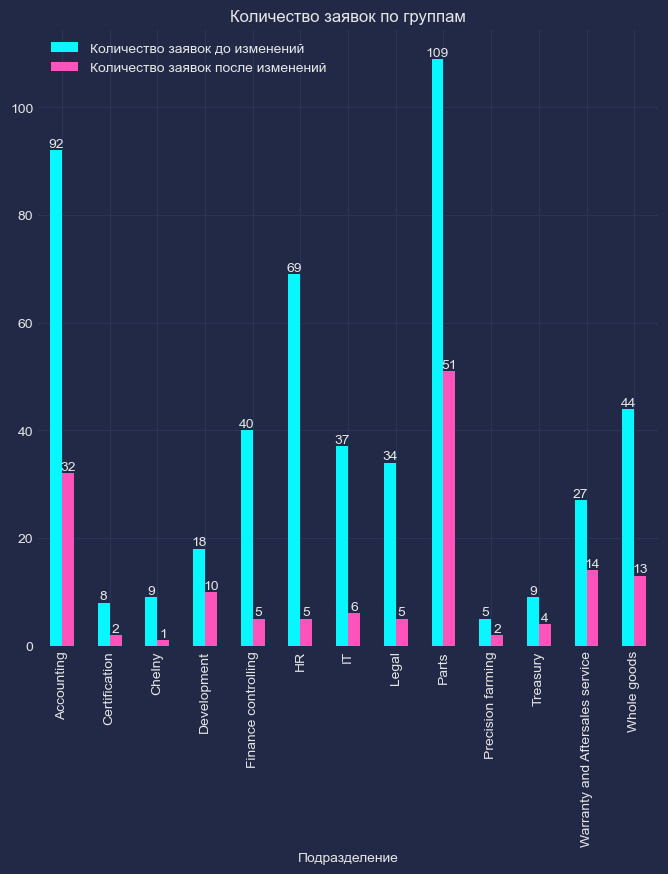

In [90]:
with plt.style.context('cyberpunk'):
    ax = dep_pivot_before.plot(x='Подразделение',
                                     y=['Количество заявок до изменений', 'Количество заявок после изменений'],
                                        kind='bar', figsize=(8,8))
    ax.set_title('Количество заявок по группам')
    plt.bar_label(ax.containers[0], rotation=0)
    plt.bar_label(ax.containers[1], rotation=0)
    plt.show()

In [94]:
frames = [data_before[['task_id', 'department']]]
data_all = pd.concat(frames)

In [111]:
data_all_pivot = data_all.pivot_table(index='department',
                                     values='task_id',
                                     aggfunc=['count']).reset_index()
data_all_pivot.columns = ['Подразделение',
                         'Количество задач']
data_all_pivot['Доля, %'] = ((data_all_pivot['Количество задач'] / data_all_pivot['Количество задач'].sum()) * 100).round(2)

In [125]:
data_all_pivot = data_all_pivot.sort_values(by='Доля, %', ascending=False)

In [126]:
data_all_pivot

,Подразделение,Количество задач,"Доля, %"
8,Parts,109,21.76
0,Accounting,92,18.36
5,HR,69,13.77
12,Whole goods,44,8.78
4,Finance controlling,40,7.98
6,IT,37,7.39
7,Legal,34,6.79
11,Warranty and Aftersales service,27,5.39
3,Development,18,3.59
2,Chelny,9,1.80


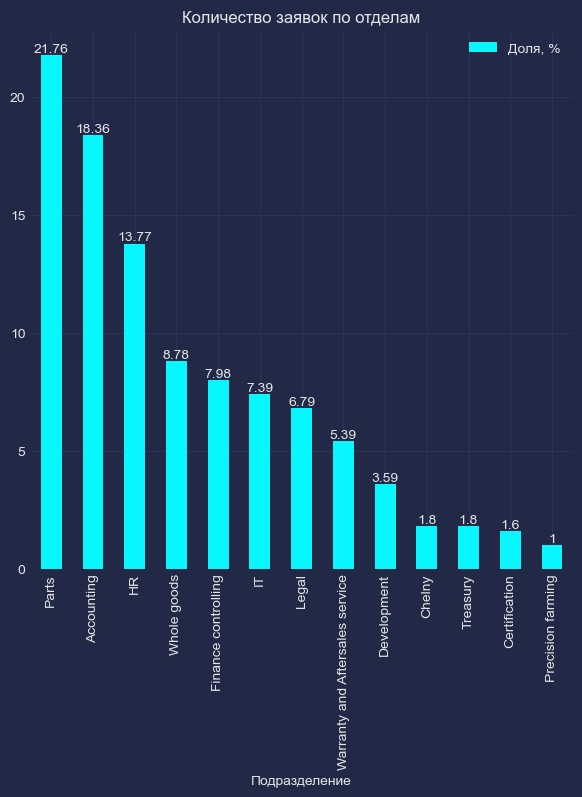

In [127]:
with plt.style.context('cyberpunk'):
    ax = data_all_pivot.plot(x='Подразделение',
                                     y='Доля, %',
                                        kind='bar', figsize=(7,7))
    ax.set_title('Количество заявок по отделам')
    plt.bar_label(ax.containers[0], rotation=0)
    plt.show()

## Общий вывод

По количеству заявок за все время лидируют отделы:  

- Parts;
- Accounting;
- HR;
- Whole goods;

Наибольшее количество задач приходит по базам 1С, на втором месте офисные программы (почта, Pyrus, VPN и т.д.).  
Среднее время до закрытия задачи: 54 минуты, но есть долгие задачи, связанные с разработкой нового функционала.  

За последние две недели по количеству заявок по базам 1С лидирует PSOP, на втором месте Approval workflows.